In [ ]:
#import kagglehub
!pip install kaggle



In [ ]:

!pip install kaggle

# NOAA Atlantic Hurricane Database dataset
!kaggle datasets download -d utkarshx27/noaa-atlantic-hurricane-database

# Unzip the downloaded dataset
import zipfile

with zipfile.ZipFile('noaa-atlantic-hurricane-database.zip', 'r') as zip_ref:
    zip_ref.extractall('noaa_dataset')

print("Dataset has been downloaded and extracted to 'noaa_dataset' directory.")


Dataset URL: https://www.kaggle.com/datasets/utkarshx27/noaa-atlantic-hurricane-database
License(s): CC0-1.0
noaa-atlantic-hurricane-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset has been downloaded and extracted to 'noaa_dataset' directory.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd

df = pd.read_csv('noaa_dataset/storms.csv')
df.head()

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [ ]:
#data = df.dropna(subset=['tropicalstorm_force_diameter','hurricane_force_diameter'])


df

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19061,19062,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,NaN,35,1003,60.0,0.0
19062,19063,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,NaN,35,1004,60.0,0.0
19063,19064,Wanda,2021,11,7,12,39.2,-34.9,other low,NaN,35,1006,90.0,0.0
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,NaN,40,1006,90.0,0.0


In [ ]:
dp = pd.DataFrame(df)

In [ ]:
dp['category'] = dp['category'].fillna(0)
dp['tropicalstorm_force_diameter'] = dp['tropicalstorm_force_diameter'].fillna(-1)
dp['hurricane_force_diameter'] = dp['hurricane_force_diameter'].fillna(-1)

In [ ]:
null=pd.isnull(dp)
null.sum()


,0
Unnamed: 0,0
name,0
year,0
month,0
day,0
hour,0
lat,0
long,0
status,0
category,0


In [ ]:
status_mapping = {
    'tropical depression': 1,
    'tropical storm': 2,
    'hurricane': 3,
    'extratropical': 4,
    'other low': 5,
    'subtropical storm': 6,
    'subtropical depression': 7,
    'disturbance': 8,
    'tropical wave': 9
}

# Apply mapping to the 'status' column
dp['status_numeric'] = dp['status'].map(status_mapping)

In [ ]:
wind_speed_min = dp['wind'].min()  # Minimum wind speed
wind_speed_max = dp['wind'].max()  # Maximum wind speed
wind_speed_range = wind_speed_max - wind_speed_min  # Range calculation

# Print the results
print(f"Minimum Wind Speed: {wind_speed_min}")
print(f"Maximum Wind Speed: {wind_speed_max}")
print(f"Range of Wind Speeds: {wind_speed_range}")

Minimum Wind Speed: 10
Maximum Wind Speed: 165
Range of Wind Speeds: 155


In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19066 non-null  int64  
 1   name                          19066 non-null  object 
 2   year                          19066 non-null  int64  
 3   month                         19066 non-null  int64  
 4   day                           19066 non-null  int64  
 5   hour                          19066 non-null  int64  
 6   lat                           19066 non-null  float64
 7   long                          19066 non-null  float64
 8   status                        19066 non-null  object 
 9   category                      19066 non-null  float64
 10  wind                          19066 non-null  int64  
 11  pressure                      19066 non-null  int64  
 12  tropicalstorm_force_diameter  19066 non-null  float64
 13  h

In [ ]:
features = dp[['year','month','day','hour','pressure', 'lat', 'long',
               'tropicalstorm_force_diameter', 'hurricane_force_diameter',
               'status_numeric']]
target = dp['wind']

In [ ]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 7.002301770798411
Mean Squared Error: 79.45138205901947
R-squared: 0.8799341204763161


In [ ]:

# cross-validation
scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

print(f"Mean MSE from Cross-Validation: {mean_mse}")


Mean MSE from Cross-Validation: 75.95699219728232


In [ ]:
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)

                              Coefficient
year                             0.112240
month                           -0.428950
day                             -0.082893
hour                             0.000362
pressure                        -1.246320
lat                             -0.336056
long                             0.025262
tropicalstorm_force_diameter    -0.002069
hurricane_force_diameter         0.010654
status_numeric                  -0.552900


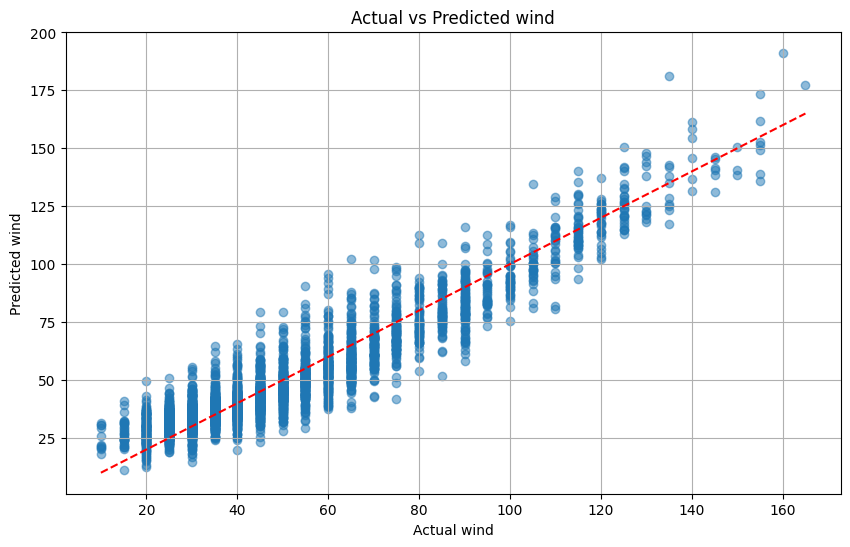

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual wind")
plt.ylabel("Predicted wind")
plt.title("Actual vs Predicted wind")
plt.grid()
plt.show()

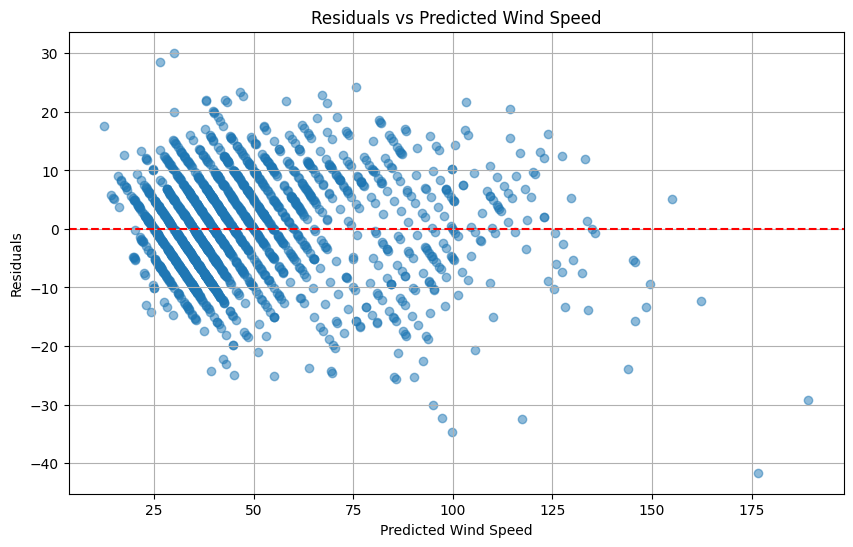

In [ ]:
residuals = y_test - y_pred

# residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Wind Speed")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Wind Speed")
plt.grid()
plt.show()